<a href="https://colab.research.google.com/github/Ashuto7h/ML-works/blob/main/predict_churn_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [506]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn

train = pandas.read_csv('https://raw.githubusercontent.com/Ashuto7h/ML-works/main/churn_dataset/train.csv')
test = pandas.read_csv('https://raw.githubusercontent.com/Ashuto7h/ML-works/main/churn_dataset/test.csv')

In [507]:
train.describe()
# print(test.describe())

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [508]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

## Univariate and Bivariate analysis
#### 1. Customer Id
total 36992 unique values. 

#### 2. Name - This field is not necessary


In [509]:
del train['Name']
del test['Name']

#### 25. churn_risk_score

In [510]:
print(train['churn_risk_score'].value_counts())
train['churn_risk_score'].replace(0,3,inplace=True)
train['churn_risk_score'].replace(-1,3,inplace=True)
train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64


3    11587
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

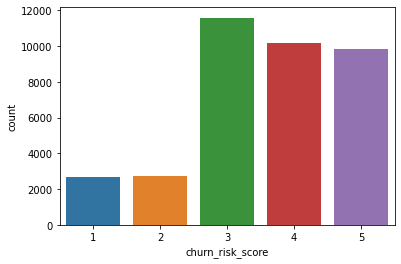

In [511]:
seaborn.countplot(data = train, x = 'churn_risk_score')

#### 3. age 

In [512]:
train['age'].replace(0,int(train['age'].mean()),inplace=True)

test['age'].replace(0,int(test['age'].mean()),inplace=True)

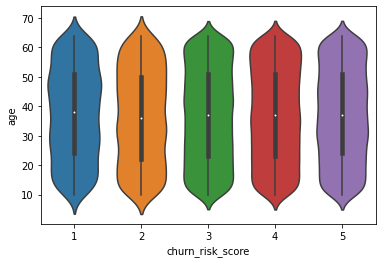

In [513]:
seaborn.violinplot(data = train, x = 'churn_risk_score', y = 'age')

__Conclusion__ : age doesn't have a major effect on target.

#### 4. Gender

In [514]:
print(train['gender'].value_counts())
train['gender'].replace('Unknown','F', inplace = True)
print(train['gender'].value_counts())

test['gender'].replace('Unknown','F', inplace = True)

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64
F    18549
M    18443
Name: gender, dtype: int64


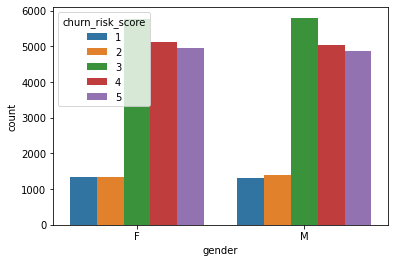

In [515]:
seaborn.countplot(data=train, x = 'gender', hue = 'churn_risk_score')

__Conclusion__ :  gender doesn't affects the target.

#### 5. security_no -
(Useless) a unique security_no used to identify a person


In [516]:
del train['security_no']
del test['security_no']

#### 6. region_category


In [517]:
print(train['region_category'].unique())
print(train['region_category'].value_counts())
print(train['region_category'].isna().sum())
train['region_category'].fillna('Town',inplace = True)
print(train['region_category'].value_counts())

test['region_category'].fillna('Town',inplace = True)

['Village' 'City' 'Town' nan]
Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64
5428
Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64


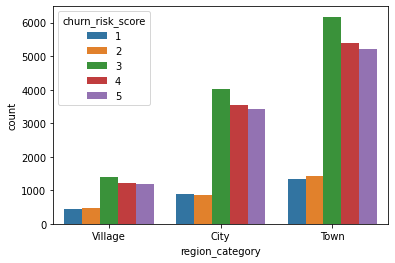

In [518]:
seaborn.countplot(data = train, x = 'region_category',hue = 'churn_risk_score')

__conclusion__ : region_category affects target.

#### 7. membership_category


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

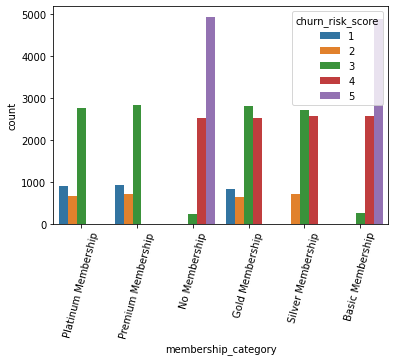

In [519]:
seaborn.countplot(data = train, x = 'membership_category', hue='churn_risk_score')
pyplot.xticks(rotation= 75)

__conclusion__ : membership_category affects churn risk score.

#### 8. joining_date
1096 unique dates.

from 2015-01-01 to 2017-12-31

not affects much, not required.

In [520]:
del train['joining_date']
del test['joining_date']

#### 9. joined_through_referral
there are some users who's `joined_through_referral = ?` but they have a unique `referral_id`.


In [521]:
print(train['joined_through_referral'].value_counts())
print(test['joined_through_referral'].value_counts())

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64
Yes    8617
No     8304
?      2998
Name: joined_through_referral, dtype: int64


In [522]:
train.loc[(train.referral_id == 'xxxxxxxx') & (train.joined_through_referral == '?'), 'joined_through_referral'] = 'No'

train.loc[(train.referral_id != 'xxxxxxxx') & (train.joined_through_referral == '?'),'joined_through_referral'] = 'Yes'

test.loc[(test.referral_id == 'xxxxxxxx') & (test.joined_through_referral == '?'), 'joined_through_referral'] = 'No'

test.loc[(test.referral_id != 'xxxxxxxx') & (test.joined_through_referral == '?'),'joined_through_referral'] = 'Yes'

print(train['joined_through_referral'].value_counts())
print(test['joined_through_referral'].value_counts())


Yes    20592
No     16400
Name: joined_through_referral, dtype: int64
Yes    11305
No      8614
Name: joined_through_referral, dtype: int64


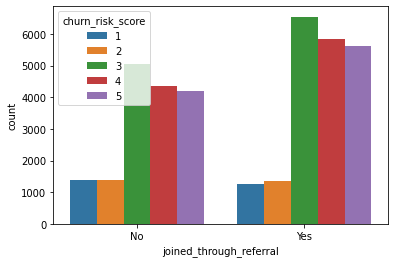

In [523]:
seaborn.countplot(data =train, x = 'joined_through_referral', hue = 'churn_risk_score')

__conclusion__ : joined_through_referral affects churn_risk_score.

#### 10. referral_id
it doesn't play a major role, because mostly one referral_id is used for only one referral. so it can be removed.


In [524]:
print('len' ,len(train['referral_id'].unique()))
print(train['referral_id'].value_counts())

del train['referral_id']
del test['referral_id']

len 11359
xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID40797        9
            ...  
CID3712         1
CID316          1
CID18968        1
CID62087        1
CID62724        1
Name: referral_id, Length: 11359, dtype: int64


#### 11. preffered_offer_types

In [525]:
print(train['preferred_offer_types'].unique())
print(train['preferred_offer_types'].value_counts())
print('nan count  : ',  train['preferred_offer_types'].isna().sum())
print('nan count  : ',  test['preferred_offer_types'].isna().sum())

['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
nan count  :  288
nan count  :  159


replacing nan values with 'Gift Vouchers/Coupons'

In [526]:
train['preferred_offer_types'].fillna('Gift Vouchers/Coupons',inplace =True)
print(train['preferred_offer_types'].value_counts())

test['preferred_offer_types'].fillna('Gift Vouchers/Coupons',inplace =True)
print(test['preferred_offer_types'].value_counts())

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
Without Offers              6663
Gift Vouchers/Coupons       6654
Credit/Debit Card Offers    6602
Name: preferred_offer_types, dtype: int64


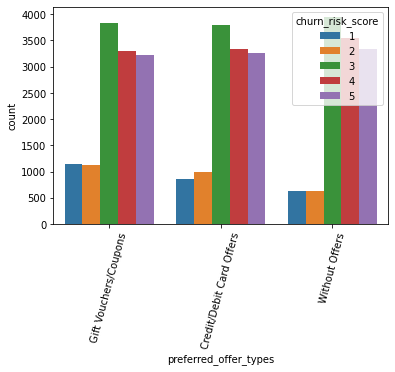

In [527]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'preferred_offer_types', hue ='churn_risk_score')

__conclusion__: preferred_offer_types affect target slightly.

#### 12. medium_of_operation

In [528]:
print(train['medium_of_operation'].unique())
print(train['medium_of_operation'].value_counts())
print()
print(test['medium_of_operation'].value_counts())


['?' 'Desktop' 'Smartphone' 'Both']
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

Desktop       7463
Smartphone    7405
?             2964
Both          2087
Name: medium_of_operation, dtype: int64


replacing all '?' with 'Desktop'

In [529]:
train['medium_of_operation'].replace('?','Desktop',inplace = True)
print(train['medium_of_operation'].value_counts())

test['medium_of_operation'].replace('?','Desktop',inplace = True)
print(test['medium_of_operation'].value_counts())

Desktop       19306
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64
Desktop       10427
Smartphone     7405
Both           2087
Name: medium_of_operation, dtype: int64


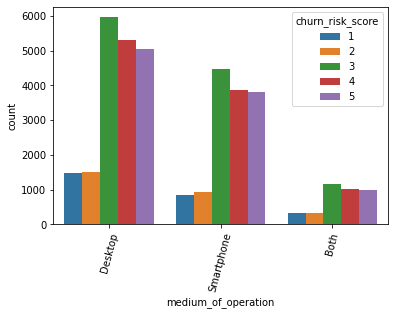

In [530]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'medium_of_operation', hue ='churn_risk_score')

__conclusion__ : medium of operation affects churn_risk_score

#### 13. internet_option


In [531]:
train['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

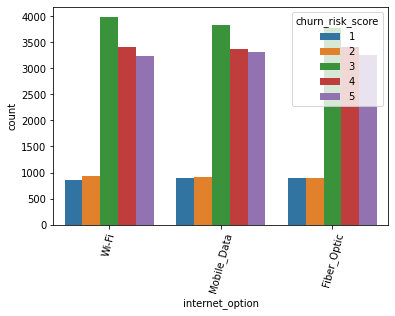

In [532]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'internet_option', hue ='churn_risk_score')

__conclusion__ : internet_option affects very slightly over the taget variable

#### 14. last_visit_time - not required

In [533]:
del train['last_visit_time']
del test['last_visit_time']

#### 15. days_since_last_login

In [534]:
print(train['days_since_last_login'].unique())

# replacing all negetive values with 0
train.loc[train.days_since_last_login < 0] = 0
test.loc[test.days_since_last_login < 0] = 0

train['days_since_last_login'].unique()


[  17   16   14   11   20   23   10   19   15   13 -999    5   12    9
   21   18    1   22    4    8    3    6    2   24    7   26   25]


array([17, 16, 14, 11, 20, 23, 10, 19, 15, 13,  0,  5, 12,  9, 21, 18,  1,
       22,  4,  8,  3,  6,  2, 24,  7, 26, 25])

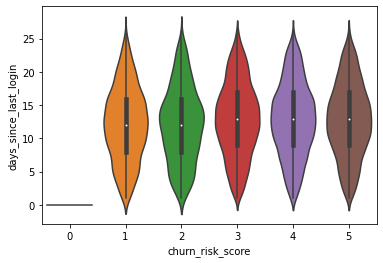

In [535]:
seaborn.violinplot(data =train, y = 'days_since_last_login',x='churn_risk_score')
pyplot.show()

__conclusion__ : days_since_last_login affects churn_risk_score.

#### 16. avg_time_spent
many values are negetive. replacing them with median

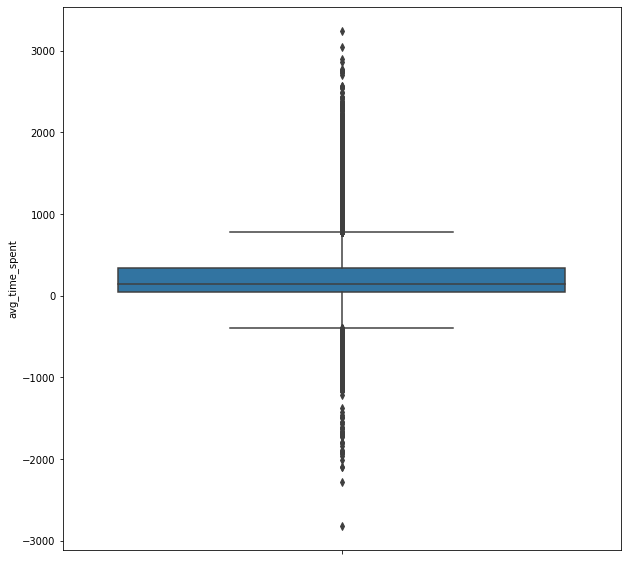

In [536]:
pyplot.figure(figsize = (10,10))
seaborn.boxplot(data= train, y = 'avg_time_spent',hue ='churn_risk_score')

In [537]:
# imputing outliers.
q_l = train['avg_time_spent'].quantile(0.01)
q_h = train['avg_time_spent'].quantile(0.99)
med = train['avg_time_spent'].median()

train.loc[(train.avg_time_spent < q_l) | (train.avg_time_spent > q_h),'avg_time_spent'] = med

test.loc[(test.avg_time_spent < q_l) | (test.avg_time_spent > q_h),'avg_time_spent'] = med

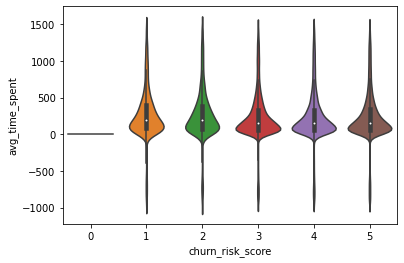

In [538]:
seaborn.violinplot(data =train, y = 'avg_time_spent',x='churn_risk_score')
pyplot.show()

#### 17. avg_transaction_value
discrete values in range 0 to 99914.05

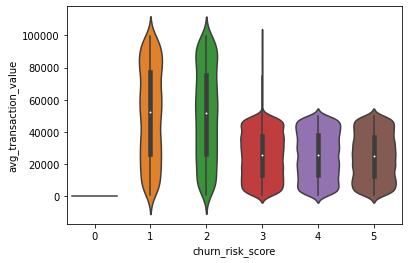

In [539]:
seaborn.violinplot(data =train, y = 'avg_transaction_value',x='churn_risk_score')
pyplot.show()

#### 18. avg_frequency_login_days

In [540]:
train['avg_frequency_login_days'].value_counts()

Error                  3340
0                      1999
13.0                   1312
8.0                    1289
14.0                   1288
                       ... 
31.627609933736142        1
35.50632877778205         1
-10.347267798197393       1
29.545210737119877        1
2.7586445823691506        1
Name: avg_frequency_login_days, Length: 1568, dtype: int64

In [541]:
train.loc[(train.avg_frequency_login_days == 'Error'),'avg_frequency_login_days'] =  0

train['avg_frequency_login_days'] = train['avg_frequency_login_days'].astype(str).astype(float)

train.loc[train.avg_frequency_login_days < 0, 'avg_frequency_login_days'] = 0

print(train['avg_frequency_login_days'].value_counts())


test.loc[(test.avg_frequency_login_days == 'Error'),'avg_frequency_login_days'] =  0

test['avg_frequency_login_days'] = test['avg_frequency_login_days'].astype(str).astype(float)

test.loc[test.avg_frequency_login_days < 0, 'avg_frequency_login_days'] = 0

0.000000     5984
13.000000    1312
8.000000     1289
14.000000    1288
17.000000    1286
             ... 
33.147512       1
53.812360       1
47.535629       1
1.618919        1
0.642723        1
Name: avg_frequency_login_days, Length: 922, dtype: int64


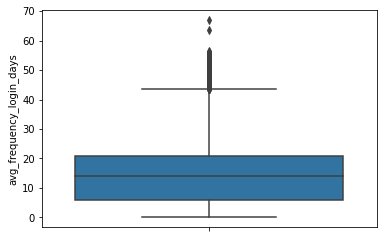

14.0


In [542]:
seaborn.boxplot(data=train, y = 'avg_frequency_login_days')
pyplot.show()
q_h = train['avg_frequency_login_days'].quantile(0.99)
med = train['avg_frequency_login_days'].median()
print(med)
train.loc[train.avg_frequency_login_days > q_h, 'avg_frequency_login_days'] = med
test.loc[test.avg_frequency_login_days > q_h, 'avg_frequency_login_days'] = med

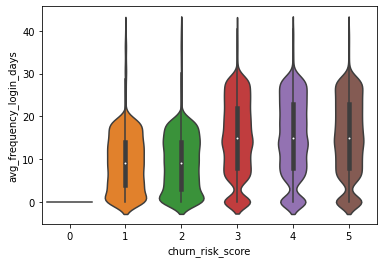

In [543]:
seaborn.violinplot(data =train, y = 'avg_frequency_login_days',x='churn_risk_score')
pyplot.show()

__conclusion__ : avg_frequency_login_days affects target.

#### 19. points_in_wallet

In [544]:
print(train['points_in_wallet'].isna().sum())
train['points_in_wallet'].fillna(train['points_in_wallet'].mean(),inplace = True)
print(train['points_in_wallet'].isna().sum())

test['points_in_wallet'].fillna(test['points_in_wallet'].mean(),inplace = True)

3276
0


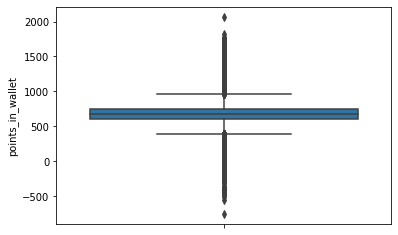

670.885


In [545]:
seaborn.boxplot(data =train, y = 'points_in_wallet')
pyplot.show()
q_h = train['points_in_wallet'].quantile(0.99)
q_l = train['points_in_wallet'].quantile(0.01)
med = train['points_in_wallet'].median()
print(med)
train.loc[(train.points_in_wallet > q_h) | (train.points_in_wallet < q_l), 'points_in_wallet'] = med
test.loc[(test.points_in_wallet > q_h) | (test.points_in_wallet < q_l), 'points_in_wallet'] = med

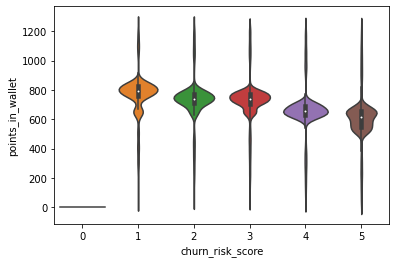

In [546]:
seaborn.violinplot(data =train, y = 'points_in_wallet',x='churn_risk_score')
pyplot.show()

__conclusion__ : points_in_wallet affects target.

#### 20. used_special_discount

In [547]:
print(train['used_special_discount'].value_counts())
train['used_special_discount'].replace(0,'No', inplace = True)
print(train['used_special_discount'].value_counts())

test['used_special_discount'].replace(0,'No', inplace = True)

Yes    19238
No     15755
0       1999
Name: used_special_discount, dtype: int64
Yes    19238
No     17754
Name: used_special_discount, dtype: int64


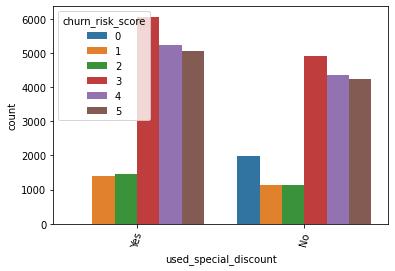

In [548]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'used_special_discount', hue ='churn_risk_score')

__conclusion__: used_special_discount affects target slightly

#### 21. offer_application_preference

In [549]:
print(train['offer_application_preference'].value_counts())
train['offer_application_preference'].replace(0,'No',inplace = True)
print(train['offer_application_preference'].value_counts())

test['offer_application_preference'].replace(0,'No',inplace = True)

Yes    19330
No     15663
0       1999
Name: offer_application_preference, dtype: int64
Yes    19330
No     17662
Name: offer_application_preference, dtype: int64


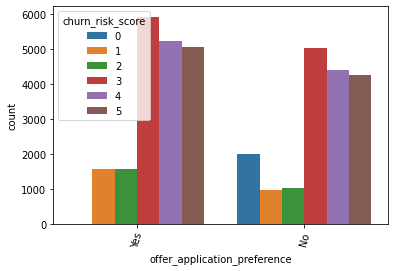

In [550]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'offer_application_preference', hue ='churn_risk_score')

__conclusion__ : offer_application_preference affects slightly

#### 22. past_complaint

In [551]:
print(train['past_complaint'].value_counts())
train['past_complaint'].replace(0,'No',inplace = True)
print(train['past_complaint'].value_counts())

test['past_complaint'].replace(0,'No',inplace = True)

No     17615
Yes    17378
0       1999
Name: past_complaint, dtype: int64
No     19614
Yes    17378
Name: past_complaint, dtype: int64


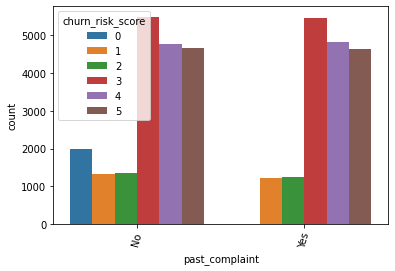

In [552]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'past_complaint', hue ='churn_risk_score')

__conclusion__ : past_complaints affect slightly.

#### 23. complaint_status

In [553]:
print(train['complaint_status'].value_counts())
train['complaint_status'].replace(0,'No Information Available',inplace = True)
print(train['complaint_status'].value_counts())

test['complaint_status'].replace(0,'No Information Available',inplace = True)

Not Applicable              17615
Solved                       4401
Unsolved                     4378
Solved in Follow-up          4328
No Information Available     4271
0                            1999
Name: complaint_status, dtype: int64
Not Applicable              17615
No Information Available     6270
Solved                       4401
Unsolved                     4378
Solved in Follow-up          4328
Name: complaint_status, dtype: int64


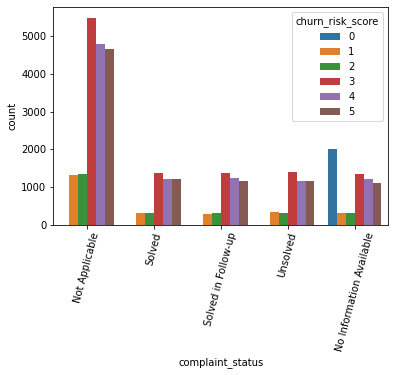

In [554]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'complaint_status', hue ='churn_risk_score')

__conclusion__ : complaint_status affects slightly.

#### 24. feedback

In [555]:
print(train['feedback'].value_counts())
train['feedback'].replace(0,'No reason specified', inplace = True)

test['feedback'].replace(0,'No reason specified', inplace = True)

Poor Product Quality        6028
Poor Website                5954
Too many ads                5929
No reason specified         5924
Poor Customer Service       5879
0                           1999
Reasonable Price            1344
User Friendly Website       1331
Products always in Stock    1313
Quality Customer Care       1291
Name: feedback, dtype: int64


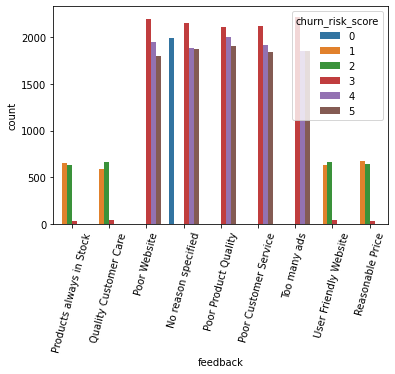

In [556]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'feedback', hue ='churn_risk_score')

__conclusion__: feedback majorly affects target.

## Other Visualizations
### all Box Plots

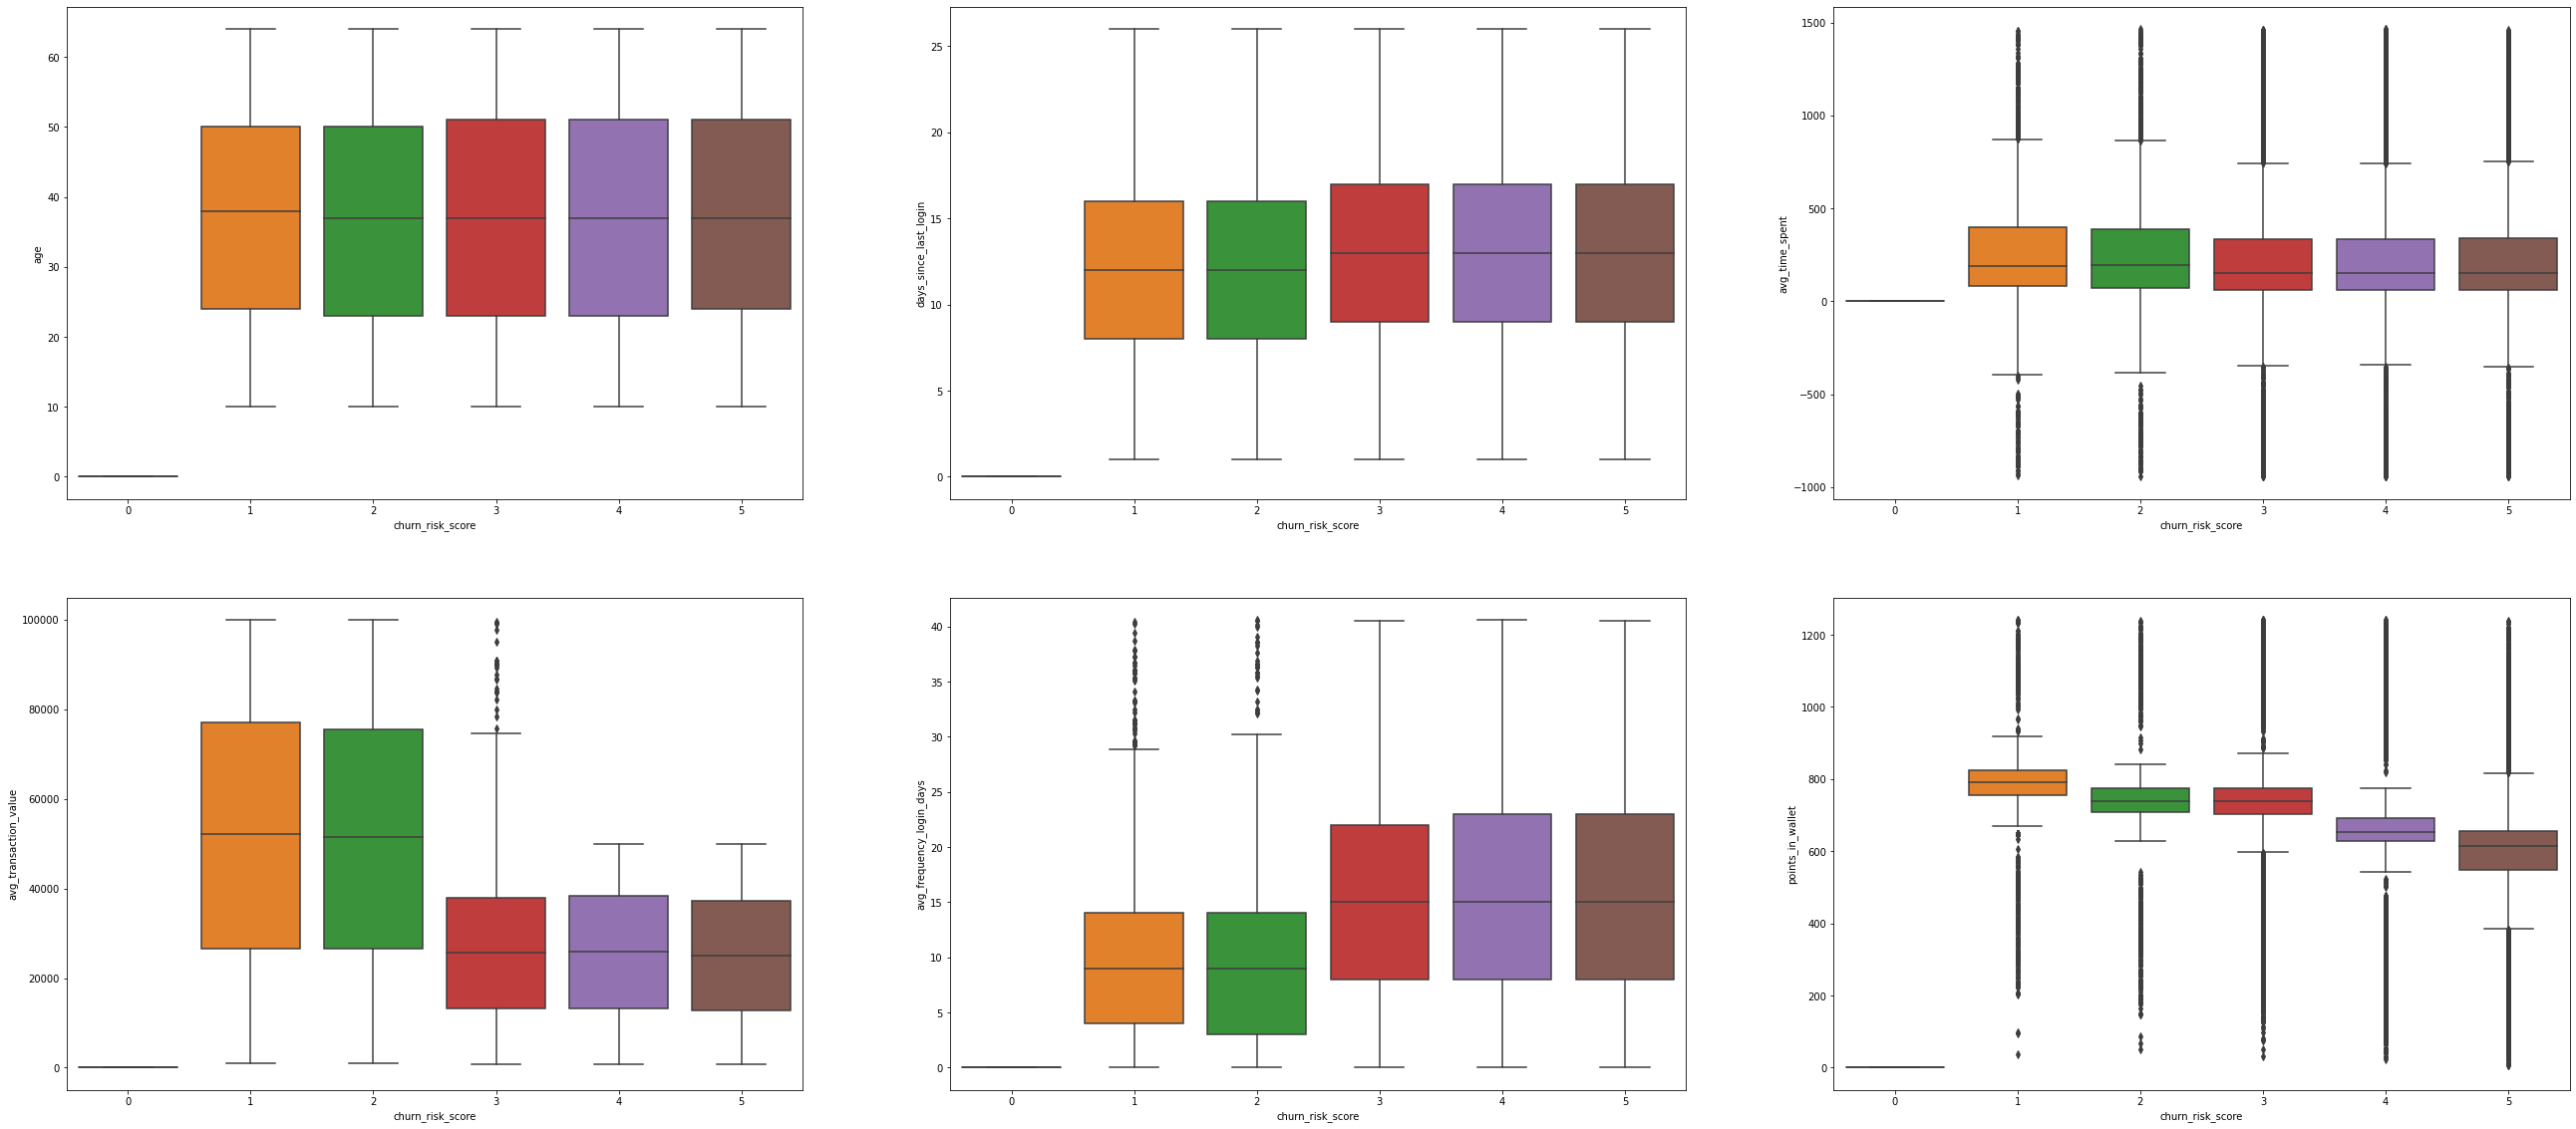

In [557]:
cols = ['age', 'days_since_last_login',	'avg_time_spent', 'avg_transaction_value','avg_frequency_login_days','points_in_wallet', 'churn_risk_score']
train_numer = pandas.DataFrame(data = train, columns = cols)

names = train_numer.columns;
ncols = len(names)
fig1 = pyplot.figure(figsize = (45,20))
axes = fig1.subplots(2, int(ncols/2))

for name, ax in zip(names, axes.flatten()):
    seaborn.boxplot(y=name, data=train_numer, x = 'churn_risk_score', ax=ax)
    
pyplot.show()

## Encoding Categorical data

In [558]:
cols = ['gender', 'region_category',
       'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
      'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback']
train_dum = pandas.get_dummies(data = train, columns = cols, drop_first=True)
test_dum = pandas.get_dummies(data = test, columns = cols, drop_first=True)
train_dum

,customer_id,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_F,gender_M,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,18,17,300.630000,53005.25,17.0,781.750000,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,32,16,306.340000,12838.38,10.0,646.551539,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,44,14,516.160000,21027.00,22.0,500.690000,5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,37,11,53.270000,25239.56,6.0,567.660000,5,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,31,20,113.130000,24483.66,16.0,663.060000,5,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,46,2,-650.682759,27277.68,6.0,639.510000,4,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
36988,fffe43004900440033003500380036003600,29,13,-638.123421,11069.71,28.0,527.990000,5,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
36989,fffe4300490044003500330034003100,23,12,154.940000,38127.56,0.0,680.470000,4,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
36990,fffe43004900440031003200390039003000,53,15,482.610000,2378.86,20.0,197.264414,3,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [559]:
train_dum.columns
dum_cols = [ 'gender_F','region_category_City',
       'membership_category_Basic Membership',
       'joined_through_referral_No',
       'preferred_offer_types_Credit/Debit Card Offers',
        'medium_of_operation_Both',
       'internet_option_Fiber_Optic', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi',
       'complaint_status_Not Applicable', 
       'feedback_Poor Customer Service']

train_dum.drop(columns = dum_cols, inplace = True)
test_dum.drop(columns = dum_cols, inplace = True)

## Train test split

In [560]:

from sklearn.model_selection import train_test_split
y = train_dum['churn_risk_score']
x = train_dum.drop(columns = ['churn_risk_score'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 42)
# print(x_train,x_test,y_train,y_test, end= '\n')

train_cid = x_train['customer_id']
test_cid = x_test['customer_id']
x_train.drop(columns = ['customer_id'], inplace = True)
x_test.drop(columns = ['customer_id'], inplace = True)

valid_cid = test_dum['customer_id']
x_valid = test_dum.drop(columns = ['customer_id'])
# print(valid_cid,x_valid[:5])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Over Sampling using smote


In [561]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = x_train.columns
os_data_x, os_data_y = os.fit_sample(x_train, y_train)
x_train = pandas.DataFrame(data=os_data_x,columns=columns )
y_train = pandas.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(x_train))
print(len(y_train))

length of oversampled data is  13302
13302


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

## Normalising dataset

In [562]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
cols = x_train.columns
x_train = pandas.DataFrame(data = scaler.fit_transform(x_train),columns = cols)
x_test = pandas.DataFrame(data = scaler.transform(x_test),columns = cols)

x_valid = pandas.DataFrame(data = scaler.transform(x_valid), columns = cols)
x_train

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.718750,0.692308,0.510475,0.654038,0.320449,0.596043,1.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0
1,0.750000,0.538462,0.442350,0.065834,0.419049,0.606290,1.000000,1.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
2,0.937500,0.153846,0.448116,0.634314,0.000000,0.641367,1.000000,1.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
3,0.500000,0.884615,0.436547,0.201356,0.172549,0.540870,1.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.375000,0.538462,0.565239,0.088818,0.197199,0.342981,0.000000,0.000000,1.000000,0.0,0.000000,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,0.412727,0.262398,0.413286,0.021955,0.419049,0.532879,1.000000,0.059218,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.940782,0.059218,0.000000,1.000000,0.940782,0.059218,0.059218,0.000000,0.059218,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0
13298,0.350350,0.876537,0.522223,0.401120,0.303565,0.471524,1.000000,0.947492,0.052508,0.0,0.947492,0.0,0.0,0.0,0.052508,0.947492,0.052508,0.947492,0.052508,1.000000,0.000000,1.000000,0.947492,0.000000,0.0,0.000000,0.947492,0.0,0.0,0.0,0.052508,0.0
13299,0.535783,0.262559,0.474958,0.259230,0.376827,0.521252,0.403789,1.000000,0.000000,0.0,0.596211,0.0,0.0,0.0,1.000000,0.000000,0.403789,1.000000,0.000000,0.403789,1.000000,0.596211,0.596211,0.000000,0.0,0.596211,0.000000,0.0,0.0,0.0,0.403789,0.0
13300,0.780788,0.198615,0.408894,0.138485,0.630230,0.416814,1.000000,1.000000,0.000000,0.0,0.108199,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.108199,0.891801,0.108199,0.891801,0.891801,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


## Recursive Feature Elimination

result of RFE
```
age True 1
days_since_last_login True 1
avg_time_spent False 5
avg_transaction_value True 1
avg_frequency_login_days True 1
points_in_wallet True 1
gender_M True 1
region_category_Town True 1
region_category_Village False 6
membership_category_Gold Membership True 1
membership_category_No Membership True 1
membership_category_Platinum Membership True 1
membership_category_Premium Membership True 1
membership_category_Silver Membership True 1
joined_through_referral_Yes True 1
preferred_offer_types_Gift Vouchers/Coupons False 3
preferred_offer_types_Without Offers False 4
medium_of_operation_Desktop True 1
medium_of_operation_Smartphone True 1
used_special_discount_Yes True 1
offer_application_preference_Yes True 1
past_complaint_Yes False 2
complaint_status_Solved False 8
complaint_status_Solved in Follow-up False 9
complaint_status_Unsolved False 7
feedback_Poor Product Quality True 1
feedback_Poor Website True 1
feedback_Products always in Stock True 1
feedback_Quality Customer Care True 1
feedback_Reasonable Price True 1
feedback_Too many ads True 1
feedback_User Friendly Website True 1
```

In [563]:
# x = x_train.columns.values.tolist()
# y=['y']

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# rfe = RFE(logreg,24)
# rfe = rfe.fit(x_train, y_train.values.ravel())

# print()
# for col, support,rank in zip(train_cols, rfe.support_, rfe.ranking_):
#     print(col,support,rank)

Removing Features suggested by RFE

In [564]:
cols = ['age','days_since_last_login',
'avg_transaction_value',
'avg_frequency_login_days',
'points_in_wallet',
'gender_M',
'region_category_Town',
'membership_category_Gold Membership',
'membership_category_No Membership',
'membership_category_Platinum Membership',
'membership_category_Premium Membership',
'membership_category_Silver Membership',
'joined_through_referral_Yes',
'medium_of_operation_Desktop',
'medium_of_operation_Smartphone',
'used_special_discount_Yes',
'offer_application_preference_Yes',
'feedback_Poor Product Quality',
'feedback_Poor Website',
'feedback_Products always in Stock',
'feedback_Quality Customer Care',
'feedback_Reasonable Price',
'feedback_Too many ads',
'feedback_User Friendly Website']
x_train = x_train[cols]
x_test = x_test[cols]
x_valid = x_valid[cols]

Implementing model


In [565]:
x_train

,age,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,region_category_Town,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,medium_of_operation_Desktop,medium_of_operation_Smartphone,used_special_discount_Yes,offer_application_preference_Yes,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.718750,0.692308,0.654038,0.320449,0.596043,1.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0
1,0.750000,0.538462,0.065834,0.419049,0.606290,1.000000,1.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
2,0.937500,0.153846,0.634314,0.000000,0.641367,1.000000,1.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0
3,0.500000,0.884615,0.201356,0.172549,0.540870,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.375000,0.538462,0.088818,0.197199,0.342981,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,0.412727,0.262398,0.021955,0.419049,0.532879,1.000000,0.059218,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.940782,0.059218,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0
13298,0.350350,0.876537,0.401120,0.303565,0.471524,1.000000,0.947492,0.0,0.947492,0.0,0.0,0.0,0.052508,0.947492,0.052508,1.000000,0.000000,0.000000,0.947492,0.0,0.0,0.0,0.052508,0.0
13299,0.535783,0.262559,0.259230,0.376827,0.521252,0.403789,1.000000,0.0,0.596211,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.403789,1.000000,0.596211,0.000000,0.0,0.0,0.0,0.403789,0.0
13300,0.780788,0.198615,0.138485,0.630230,0.416814,1.000000,1.000000,0.0,0.108199,0.0,0.0,0.0,1.000000,0.108199,0.891801,0.108199,0.891801,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [566]:
y_train_unit = y_train.divide(5)
import statsmodels.api as sm
# print(y_train.shape,x_train.shape)
logit_model = sm.Logit(y_train_unit,x_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.474972
         Iterations 7
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.315     
Dependent Variable:          y                       AIC:                     12684.1525
Date:                        2021-03-31 12:17        BIC:                     12864.0485
No. Observations:            13302                   Log-Likelihood:          -6318.1   
Df Model:                    23                      LL-Null:                 -9220.2   
Df Residuals:                13278                   LLR p-value:             0.0000    
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              7.0000                                                     
----------------------------------------------------------------------------------------
                                         Coef

__conclusion__ : p(> 0.05) for 
avg_transaction_value,
gender_M, feedback_Poor Website, feedback_Too many ads

In [567]:
cols=['avg_transaction_value','gender_M', 'feedback_Poor Website', 'feedback_Too many ads']
x_train.drop(columns = cols,inplace =True)
logit_model=sm.Logit(y_train_unit,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.475293
         Iterations 7
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.314     
Dependent Variable:          y                       AIC:                     12684.6975
Date:                        2021-03-31 12:17        BIC:                     12834.6109
No. Observations:            13302                   Log-Likelihood:          -6322.3   
Df Model:                    19                      LL-Null:                 -9220.2   
Df Residuals:                13282                   LLR p-value:             0.0000    
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              7.0000                                                     
----------------------------------------------------------------------------------------
                                         Coef

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [569]:
cols=['feedback_Poor Product Quality']
x_train.drop(columns = cols,inplace =True)
logit_model=sm.Logit(y_train_unit,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.475380
         Iterations 7
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.314     
Dependent Variable:          y                       AIC:                     12685.0045
Date:                        2021-03-31 12:19        BIC:                     12827.4222
No. Observations:            13302                   Log-Likelihood:          -6323.5   
Df Model:                    18                      LL-Null:                 -9220.2   
Df Residuals:                13283                   LLR p-value:             0.0000    
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              7.0000                                                     
----------------------------------------------------------------------------------------
                                         Coef

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [570]:
x_train.columns

Index(['age', 'days_since_last_login', 'avg_frequency_login_days',
       'points_in_wallet', 'region_category_Town',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_Yes',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_User Friendly Website'],
      dtype='object')

In [571]:
# finalizing datasets
cols = ['age', 'days_since_last_login', 'avg_frequency_login_days',
       'points_in_wallet', 'region_category_Town',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_Yes',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_User Friendly Website']

x_test = x_test[cols]
x_valid = x_valid[cols]


# Building Models
## 1. Logistic Regression

In [577]:
# for normalized data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

print('\nAccuracy of train: {:.2f}'
     .format(logreg.score(x_train, y_train)))

y_pred = logreg.predict(x_test)
print('\nAccuracy of test: {:.2f}\n'
     .format(logreg.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy of train: 0.77

Accuracy of test: 0.72



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
